# Linear Regression Using Scikit-Learn 

## Step 1 : Data Preprocessing 

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler 

#Load Dataset 
df = pd.read_csv("area_price_dataset.csv")

print("\nOrignal Data:")
print(df)


Orignal Data:
   Area  Price
0   600     35
1   750     42
2   850     48
3   900     50
4  1000     58
5  1100     65
6  1250     72
7  1400     80
8  1600     92
9  1800    105


# 2 Check For null values 

In [23]:
# 2 check for null values
print("\nChecking Null Values:")
print(df.isnull().sum());


Checking Null Values:
Area     0
Price    0
dtype: int64


## 3. Split X and Y 
###   Purpose : Separting the input (Area) from what we want to predict 

In [24]:
#3 Split X and Y
X = df[['Area']]  # Feature 
y = df[['Price']] # Target

print(X) 
print(y)

   Area
0   600
1   750
2   850
3   900
4  1000
5  1100
6  1250
7  1400
8  1600
9  1800
   Price
0     35
1     42
2     48
3     50
4     58
5     65
6     72
7     80
8     92
9    105


## 4. Scaling : Scaling makes all features (Columns) equal in range , so the model learns better.
###   This code scales the Area values into small , equal range so the model can learn better.

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nScaled Area Values:");
print(X_scaled[:5]);


Scaled Area Values:
[[-1.43889629]
 [-1.02778306]
 [-0.75370758]
 [-0.61666984]
 [-0.34259435]]


## 5. T-Test / Z-Test / F-Test : Test Satistical significance
##    Split means dividing the data into two parts. one for training the model and one for testing it 
##    Train-Test Split Test model Preformance 
##    Used for Model Accuracy Checking

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=42) #0.2 = 20% 
# 42 is the industry standard (just a commnly used number)

# 6. Train Linear Regression Model 
model = LinearRegression();
model.fit(X_train, y_train);

print("Model Trained Sucessfully!");

Model Trained Sucessfully!


In [27]:

# MAKE PREDICTIONS
y_pred = model.predict(X_test)

# PRINT ACTUAL vs PREDICTED 
actual_vals = y_test.values.flatten()
pred_vals = y_pred.flatten()

print("\nActual vs Predicted:")
for actual, pred in zip(actual_vals, pred_vals):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")


Actual vs Predicted:
Actual: 92.00, Predicted: 92.75
Actual: 42.00, Predicted: 42.84


## PLot Regression Line

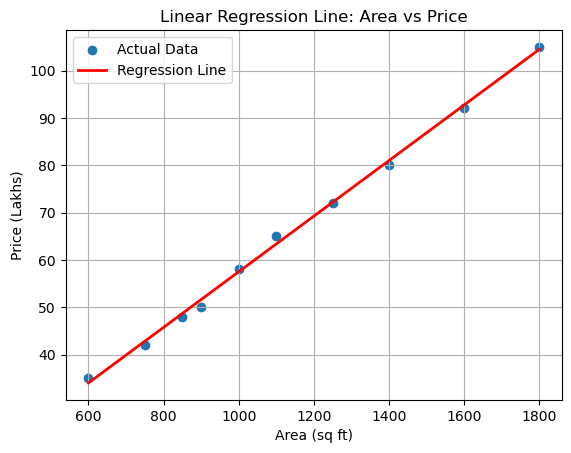

In [28]:
import numpy as np

# Scatter actual data
plt.scatter(df["Area"], df["Price"], label="Actual Data")

# Create smooth area values
area_range = np.linspace(df["Area"].min(), df["Area"].max(), 100)

# Scale them (important)
area_scaled = scaler.transform(pd.DataFrame({"Area": area_range}))

# Predict prices for smooth line
price_line = model.predict(area_scaled)

# Plot the straight regression line
plt.plot(area_range, price_line, color="red",linewidth=2, label="Regression Line")

plt.xlabel("Area (sq ft)")
plt.ylabel("Price (Lakhs)")
plt.title("Linear Regression Line: Area vs Price")
plt.legend()
plt.grid(True)
plt.show()

# Model Predicted 92.75 and Real Value was 92 
### prediction is very close (good model)


In [29]:
input_area = float(input("\nEnter Area (sq ft):"))

scaled_area = scaler.transform(pd.DataFrame({'Area':[input_area]}))

predicted_price = model.predict(scaled_area).flatten()

print(f"\nPredicted price for Area {input_area} sq.ft = ₹ {predicted_price[0]:.2f} lakhs")



Enter Area (sq ft): 90



Predicted price for Area 90.0 sq.ft = ₹ 4.09 lakhs
